<a href="https://colab.research.google.com/github/muscak/Loan-Prediction/blob/master/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Return Prediction

A loan is a form of debt incurred by an individual or other entity. The lender - usually a corporation, financial institution, or government - advances a sum of money to the borrower. In return, the borrower agrees to a certain set of terms including any finance charges, interest, repayment date, and other conditions.

We are going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Modelling using Deep Neural Network 

## Problem Defition

It's better to know for the loaner if how likely an individual or an entity will pay the loan back or not in advance. From this angle this is a binary classification problem. That's why our target is to build a Machine Learning model which can predict it with high accuracy.

## Data

The sample dataset is taken from the [Kaggle](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set). The dataset has 12 columns. It has 11  features to be used predicting the label which is Status columns in the dataset. You can see the data dictionary [here](Data/README.md).

## Evaluation

> If we can reach more than 90% accuracy at predicting whether or not a customer is going to come back and purchase new audiobook, we'll pursue the project.

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
⚠️ Note: Due to the nature of experimentation, the evaluation metric may change over time.
</div>

## Import Libraries

We're going to use:
- [pandas](https://pandas.pydata.org/) for data analysis.
- [NumPy](https://numpy.org/) for numerical operations.
- [Matplotlib](https://matplotlib.org/) / [seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
- [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [184]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set(style="ticks")

# Preprocessing the data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Linear Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Non-linear Models from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Ensemble Models from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

## Load Data

In [2]:
raw_data = pd.read_csv('Data/loan_train.csv')
raw_data.shape # number of rows and columns

(614, 12)

## 📈 Data Exploration (Exploratory Data Analysis - EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
# Keeping the original dataset aside just in case
df = raw_data.copy() 

In [4]:
# It's essential to always eyeball your data first!
# Check for error!
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(df)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.000000e+00,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,1.508000e+05,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.000000e+00,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,2.358000e+05,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.000000e+00,14100000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,541700,4.196000e+05,26700000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,233300,1.516000e+05,9500000,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,303600,2.504000e+05,15800000,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,400600,1.526000e+05,16800000,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,1284100,1.096800e+06,34900000,360.0,1.0,Semiurban,N


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
✍🏼 <b>Observations</b>

- Dependens column contains "3+" values which makes it an object.
- Many of the columns has null values which needs to be handled in a way.
- Credit History should contain categorical values not float.
</div>

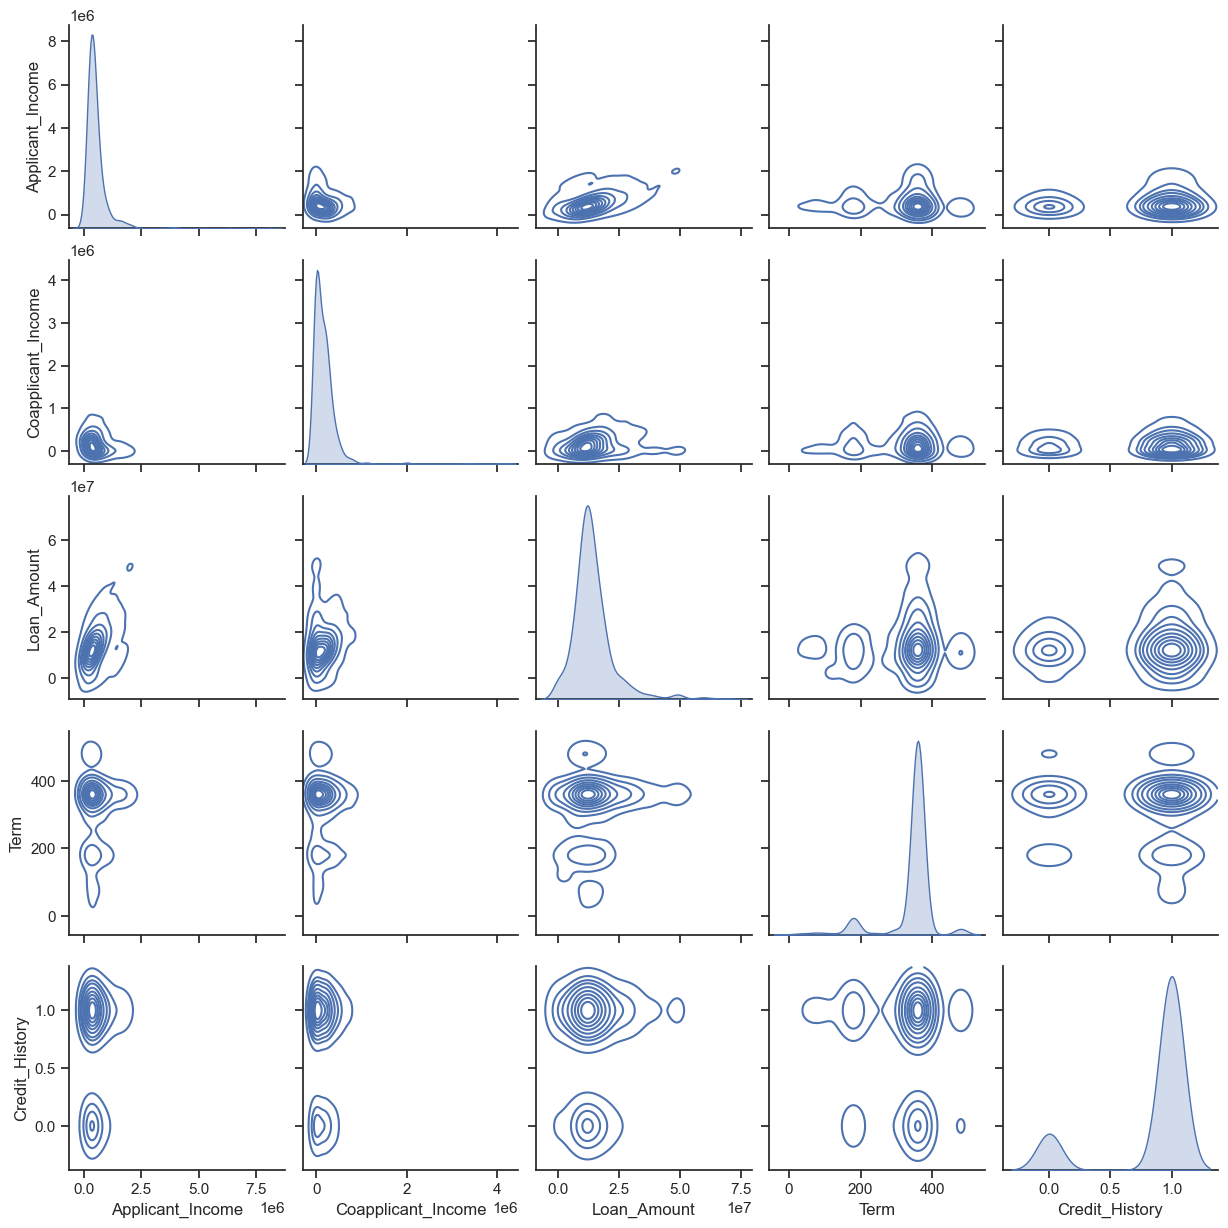

In [8]:
sb.pairplot(df.drop('Status', axis=1), kind='kde', diag_kind='kde')
plt.show()

In [9]:
count = len(df['Status'])
count_y = df['Status'].value_counts()[0]
count_n = count - count_y
print('Y: %d %.2f%%' % (count_y, (count_y/count)*100))
print('N: %d %.2f%%' % (count_n, (count_n/count)*100))

Y: 422 68.73%
N: 192 31.27%


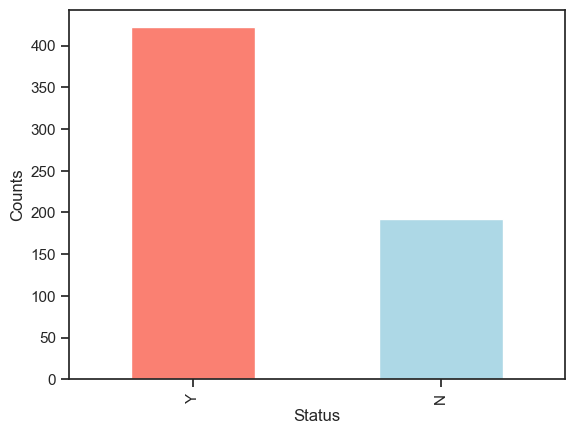

In [10]:
df['Status'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.xlabel('Status')
plt.ylabel('Counts')
plt.show()

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b> The dataset needs balancing. Otherwise, even a wild guess will have a chance around 70% that it's going to be correct.
</div>

### Categorical Features

In [49]:
# Updating the data type of Credit_History column as mentioned above
df['Credit_History'] = df['Credit_History'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    object 
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 57.7+ KB


In [38]:
def count_plot(feature_list):
    n_cols = 2
    n_rows = round(len(feature_list)/n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 20))
    
    for i, feature in enumerate(feature_list):
        row_idx = i // n_cols 
        col_idx = i % n_cols
        sb.countplot(data=df, x=feature, hue='Status', ax=axes[row_idx, col_idx])
    plt.show()

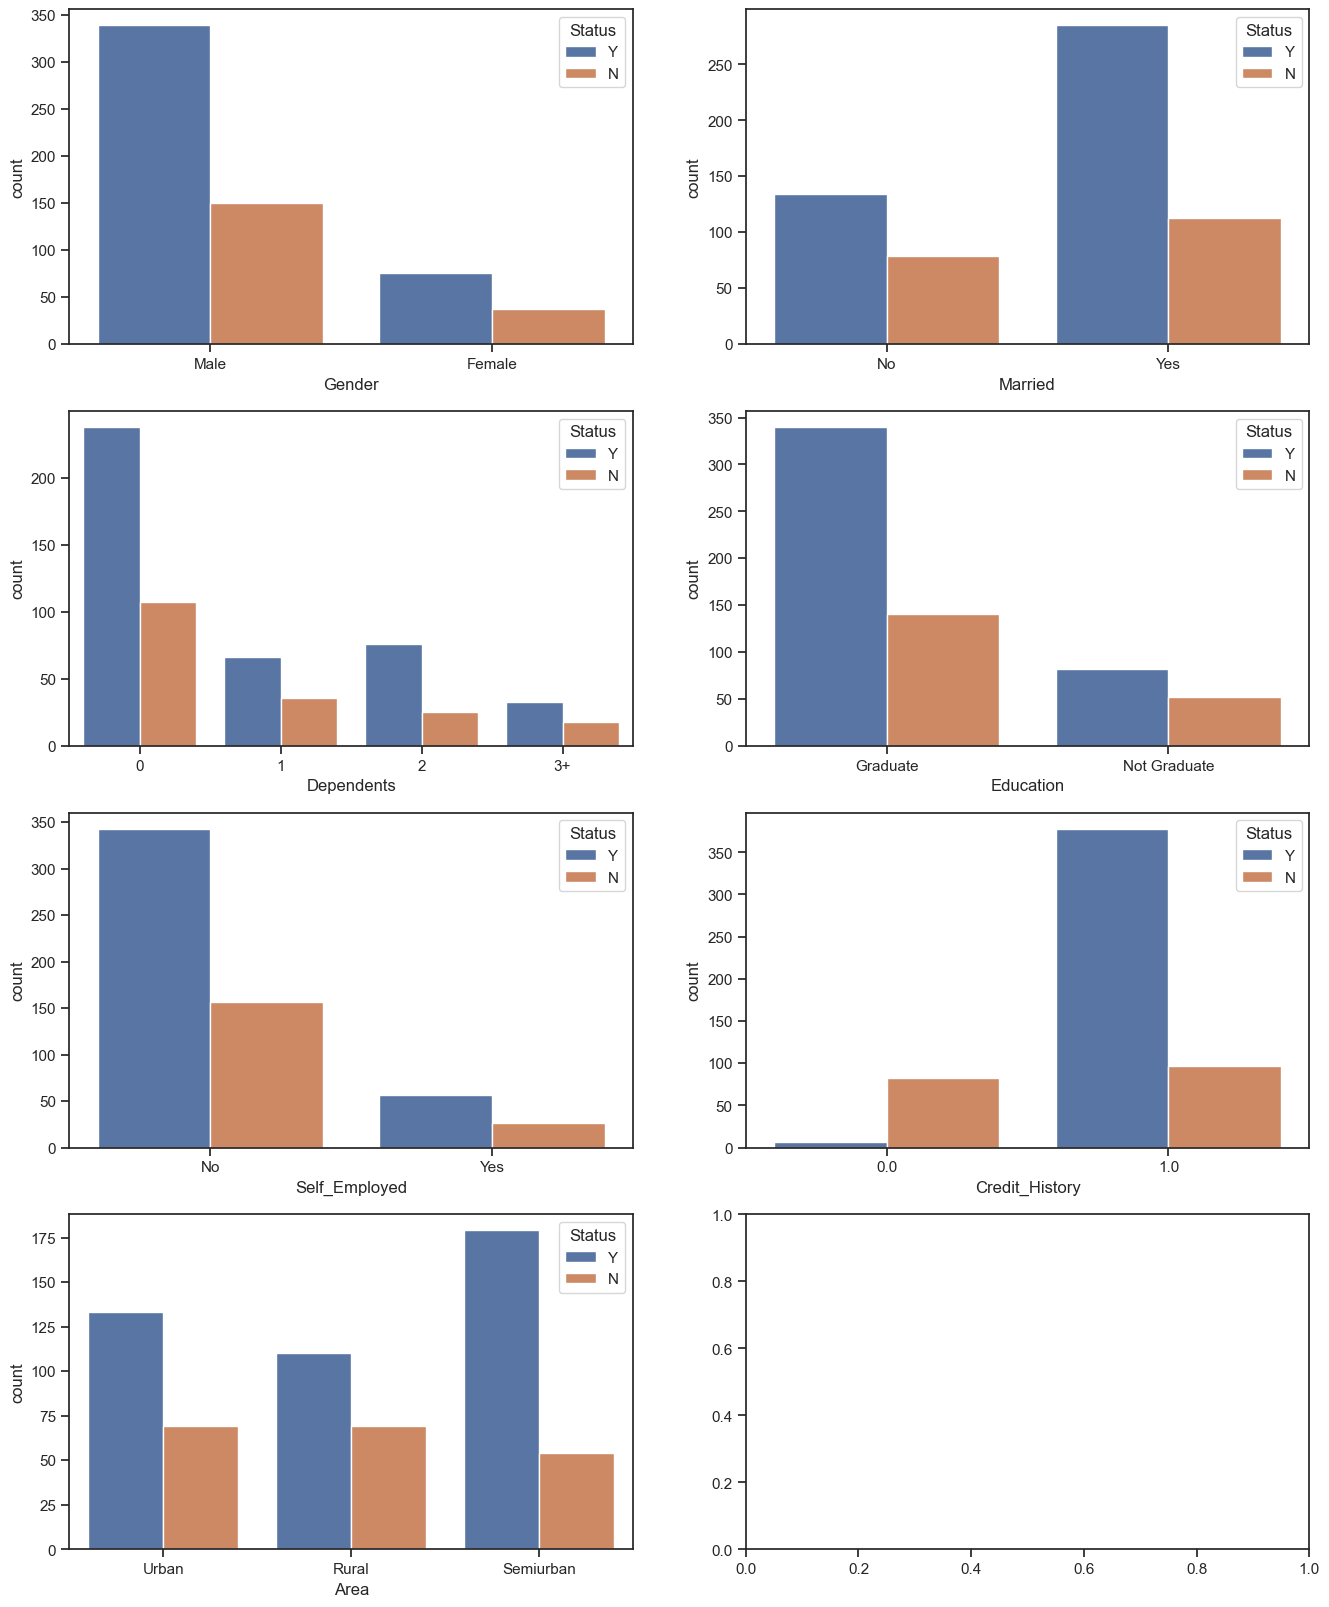

In [39]:
cat_features = []
nbr_features = []
for i in df.drop('Status', axis=1).columns:
    if df[i].dtype == 'O':
        cat_features.append(i)
    else:
        nbr_features.append(i)

count_plot(cat_features)

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b> 
    <ul>
        <li>Majority of the applicants are married.</li>
        <li>Majority of the applicants are working as employee. Self employeed applicants are minority.</li>
        <li>Majority of the applicants have graduate degree</li>
        <li>The number of rejected applications are similar for the applicants who have or have not credit history.</li>
        <li>The number of applicants who live in Urban and Rural areas are similar to each other. However, the majority live in Semiurban areas.</li>
    </ul>
</div>

### 🔢 Numerical Features <a id='nbr_features'></a>

In [61]:
def hist_plot(feature):
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(0.15, 0.85)})
    
    sb.boxplot(data=df, x=feature, color='lightblue', ax=ax_box)
    ax_box.set_title(feature.replace('_', ' '), fontsize=16)
    ax_box.set_xlabel('')
    sb.histplot(data=df, x=feature, kde=True, hue='Status', ax=ax_hist)
    
    plt.tight_layout()
    plt.show()

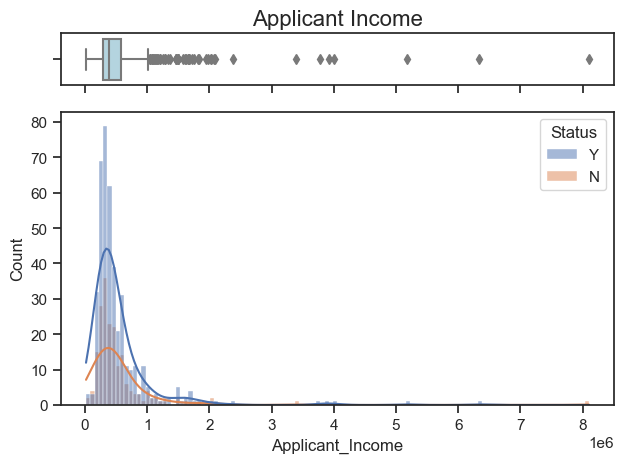

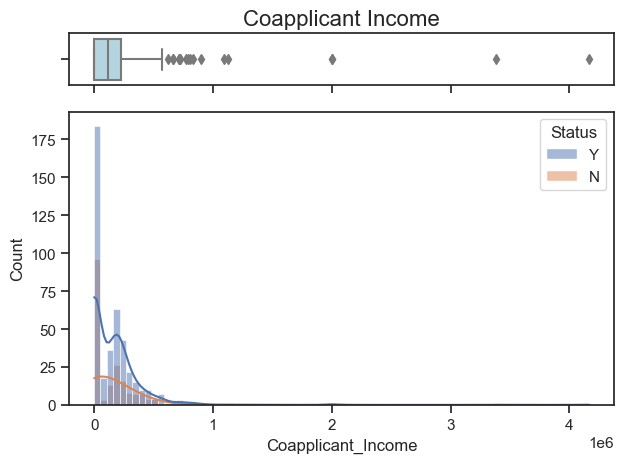

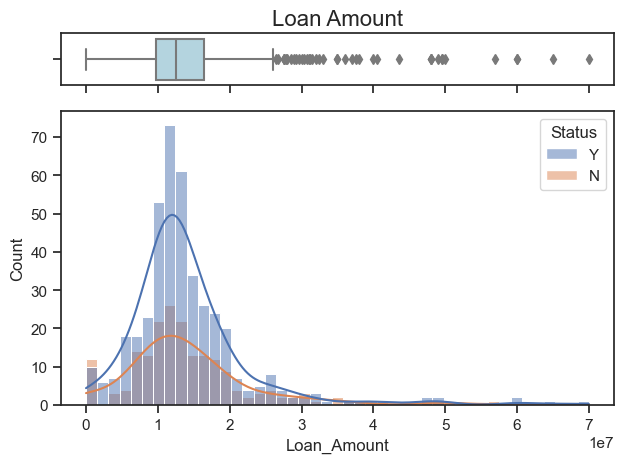

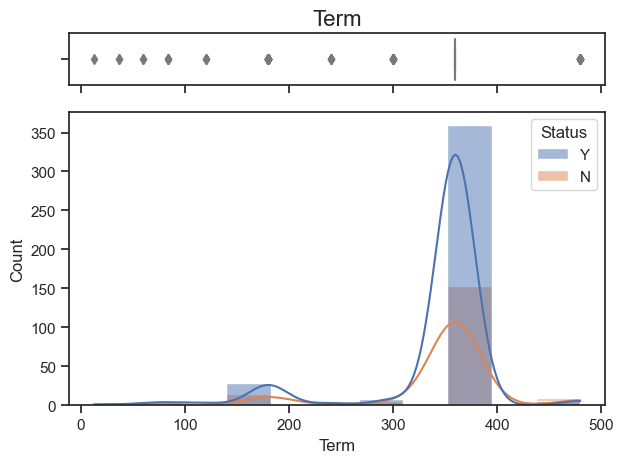

In [62]:
for i in nbr_features:
    hist_plot(i)

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b> 
    <ul>
        <li>The numerical features follow the normal distribution with a little skewness.</li>
        <li>All numerical features have outliers. The values above 1.5 for Applicant_Income, 0.5 for Coapplicant_Income and 30 for Loan_Amount should be ommitted.</li>
        <li>It's better to treat the Term as categorical feature as most of the values at a certain point.</li>
    </ul>
</div>

In [50]:
# Checking if the Term feature can be categorical or not
df['Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Term, dtype: int64

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b> It seems that has only 10 different values which make it a good candidate to turn it into categorical feature. By just looking at the distribution plot, we may assume that 12, 36, 60, 84, 120 and 240 are outliers, the remaining number of items will be only 4. And by removing these 6 values, the overall impact on the dataset would be only 15 datapoints which is neglectable.
</div>

In [63]:
df['Total_Income'] = df['Applicant_Income'] + df['Coapplicant_Income']

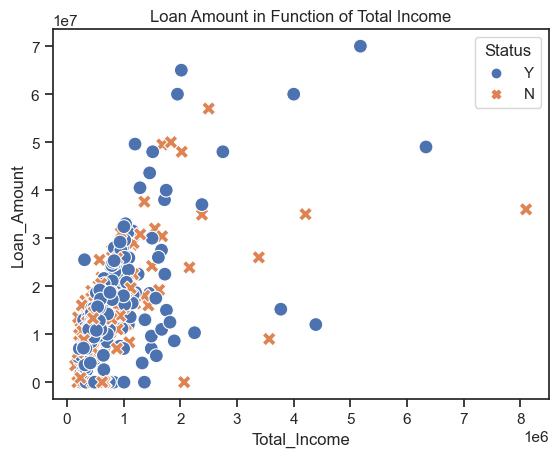

In [82]:
sb.scatterplot(data=df, x='Total_Income', y='Loan_Amount', hue='Status', style='Status', s=100)
plt.title('Loan Amount in Function of Total Income')
plt.show()

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b> As per the above plot, we can see that the most of the applicants have less than 2 total income. It's hard to say there is a direct correlation between the total income and the amount of the loan by just looking at the plot.  However, it's easy to see that the rejection of a loan application can be directly related to the amount of the total income.
</div>

### Correlation between independent variables

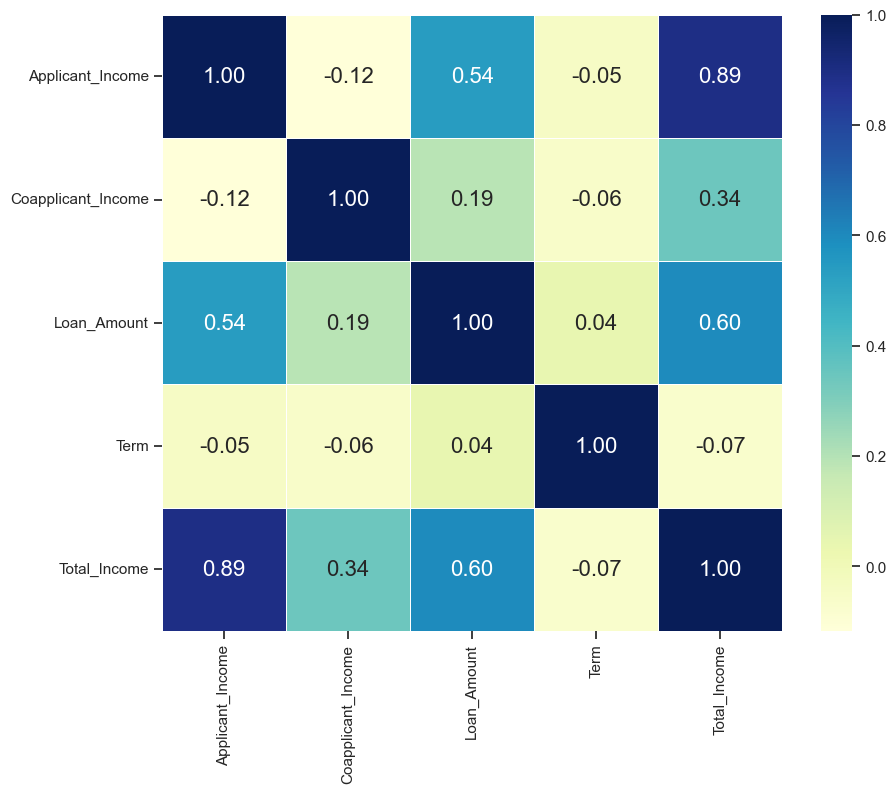

In [74]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu",
            annot_kws={'fontsize':16});

## Data Preprocessing

1. Handle the null values
2. Handle the duplicates
3. Encode categorical features
4. Remove outliers
5. Balance the dataset
6. Split the dataset
7. Scale the numerical features

>❗️ Before applying random under-sampling to balance the dataset, it's generally recommended to handle outliers. Outliers can affect the distribution of the data and the decision boundaries of the classification model, potentially leading to biased results.

>❗️ We need to split the dataset into train and test before applying any scaling not cause any data leakage.

### Drop the columns that we'll not use

We are going to use all features (columns) in this dataset so this step is not applicable. That's why it's better to remove the newly generated column 'Total_Income' for EDA purpose, as it's highly correlated to 'Applicant_Income' and 'Coapplicant_Income' which may cause multicolinearity for some models.

In [83]:
df.drop('Total_Income', axis=1, inplace=True)

### Dropping Missing Values

In [84]:
df.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [85]:
df_full = df.dropna().reset_index(drop=True)
df_full.shape

(499, 12)

### Dropping Duplicates

In [86]:
df_no_dup = df_full.drop_duplicates().reset_index(drop=True)
df_no_dup.shape

(499, 12)

### Removing Outliers

As mentioned in the ['Numerical Features'](#nbr_features) EDA section, all numerical features has outliers. The limits for the min and max values are listed in the below table by checking the box_plot of each feature.

|Min Value|Feature|Max Value|
|---------|-------|---------|
|0| Applicant_Income |1000000|
|0|Coapplicant_Income|500000|
|0|Loan_Amount|30000000|
|240|Term|360|

In [119]:
df_clean = df_no_dup[(df_no_dup['Applicant_Income'] < 1000000) & 
                    (df_no_dup['Coapplicant_Income'] < 500000) &
                    (df_no_dup['Loan_Amount'] < 30000000) & 
                    (df_no_dup['Term'] > 240)].reset_index().drop('index', axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              386 non-null    object 
 1   Married             386 non-null    object 
 2   Dependents          386 non-null    object 
 3   Education           386 non-null    object 
 4   Self_Employed       386 non-null    object 
 5   Applicant_Income    386 non-null    int64  
 6   Coapplicant_Income  386 non-null    float64
 7   Loan_Amount         386 non-null    int64  
 8   Term                386 non-null    object 
 9   Credit_History      386 non-null    object 
 10  Area                386 non-null    object 
 11  Status              386 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 36.3+ KB


### Encoding Categorical Features

As mentioned in the ['Numerical Features'](#nbr_features) EDA section, 'Term' feature will be considered as categorical.
We'll use OrdinalEncoder for 'Dependents' and 'Term' features and dummy encoding for the reamining categorical features.

In [120]:
df_clean['Term'] = df_clean['Term'].astype('object')
cat_features.append('Term') # We'll use later
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              386 non-null    object 
 1   Married             386 non-null    object 
 2   Dependents          386 non-null    object 
 3   Education           386 non-null    object 
 4   Self_Employed       386 non-null    object 
 5   Applicant_Income    386 non-null    int64  
 6   Coapplicant_Income  386 non-null    float64
 7   Loan_Amount         386 non-null    int64  
 8   Term                386 non-null    object 
 9   Credit_History      386 non-null    object 
 10  Area                386 non-null    object 
 11  Status              386 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 36.3+ KB


In [121]:
df_clean['Term'].value_counts()

360.0    366
480.0     12
300.0      8
Name: Term, dtype: int64

In [122]:
ordinal = OrdinalEncoder()
ord_array = ordinal.fit_transform(df_clean[['Dependents', 'Term']])
df_ord_array = pd.DataFrame(ord_array, columns=['Dependents_Enc', 'Term_Enc'])
df_enc = pd.concat([df_clean, df_ord_array], axis=1)
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              386 non-null    object 
 1   Married             386 non-null    object 
 2   Dependents          386 non-null    object 
 3   Education           386 non-null    object 
 4   Self_Employed       386 non-null    object 
 5   Applicant_Income    386 non-null    int64  
 6   Coapplicant_Income  386 non-null    float64
 7   Loan_Amount         386 non-null    int64  
 8   Term                386 non-null    object 
 9   Credit_History      386 non-null    object 
 10  Area                386 non-null    object 
 11  Status              386 non-null    object 
 12  Dependents_Enc      386 non-null    float64
 13  Tem_Enc             386 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 42.3+ KB


In [123]:
df_dummy = pd.get_dummies(df_enc[['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Area']], drop_first=True)
df_enc = pd.concat([df_enc, df_dummy], axis=1)
df_enc.drop(cat_features, axis=1, inplace=True)
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Applicant_Income        386 non-null    int64  
 1   Coapplicant_Income      386 non-null    float64
 2   Loan_Amount             386 non-null    int64  
 3   Status                  386 non-null    object 
 4   Dependents_Enc          386 non-null    float64
 5   Tem_Enc                 386 non-null    float64
 6   Gender_Male             386 non-null    uint8  
 7   Married_Yes             386 non-null    uint8  
 8   Education_Not Graduate  386 non-null    uint8  
 9   Self_Employed_Yes       386 non-null    uint8  
 10  Credit_History_1.0      386 non-null    uint8  
 11  Area_Semiurban          386 non-null    uint8  
 12  Area_Urban              386 non-null    uint8  
dtypes: float64(3), int64(2), object(1), uint8(7)
memory usage: 20.9+ KB


/var/folders/xm/3h6hfxmn0158s2wvp_w5r6700000gn/T/ipykernel_22116/2995750207.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_dummy = pd.get_dummies(df_enc[['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Area']], drop_first=True)


### Determine the Features and Targets

In [129]:
x = df_enc.drop('Status', axis=1).values
lab_encoder = LabelEncoder()
y = lab_encoder.fit_transform(df_enc['Status'].values)
print('Shape of x:', x.shape)
print('Shape of y:', y.shape)

Shape of x: (386, 12)
Shape of y: (386,)


### Splitting the Dataset

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101, shuffle=True)

print('Shape of training set:', x_train.shape)
print('Shape of test set:', x_test.shape)

Shape of training set: (308, 12)
Shape of test set: (78, 12)


### Scaling the Numerical Features



In [150]:
scaler = StandardScaler()
scaler.fit(x_train[:, :3])
x_train_scaled = scaler.transform(x_train[:, :3])
# Replace the scaled columns in the copied array
x_train[:, :3] = x_train_scaled
x_train.shape

(308, 12)

### Balancing the Dataset

We'll use `RandomUnderSampler` from `imblearn` library. We'll set `random_state` parameter to `101` for reproducing purpose. Also, `sampling_strategy` will be set to `majority` which will undersample the majority class determined by the class with the largest number of examples.

In [141]:
unique_values, value_counts = np.unique(y_train, return_counts=True)

for value, count in zip(unique_values, value_counts):
    print('%d: %d - %.1f%% of total training samples' % (value, count, (count/y_train.shape[0])))

0: 93 - 0.3% of total training samples
1: 215 - 0.7% of total training samples


0    93
1    93
dtype: int64


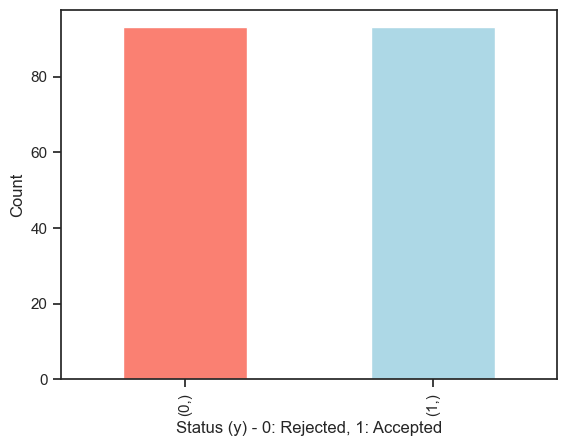

In [187]:
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=101)

x_under, y_under = undersample.fit_resample(x_train, y_train)

# Create a dataframe to plot the number of samples for each label
df_y_under = pd.DataFrame(y_under)
print(df_y_under.value_counts())

df_y_under.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.xlabel('Status (y) - 0: Rejected, 1: Accepted')
plt.ylabel('Count')
plt.show()

## Modeling

Before moving further with the datapreprocessing it's better to create a baseline for the modelling.

We've explored the data, now we'll try to use machine learning to predict our target variable based on the 12 independent variables. We'll create a function which evaluates the performance of several algorithms so we can call it repeatedly with different inputs such as by rescaling the features or eleminating features by their importance. We'll evaluate:

Linear Algorithms
1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)

Non-linear Algorithms

3. Decision Tree Classifier (DT)
4. $k$-Neighbors Classifier (KNN)
5. Support Vector Classifier (SVC)
6. Gaussian Naive Bayes (GNB)

Ensemble Algorithms 

7. Random Forest Classifier (RFC)
8. AdaBoost Classifier (ABC)
9. Gradient Boosting Classifier (GBC)

Based on the result we'll decide on the model, then we'll fine tune the hyperparameters.


In [181]:
def evaluate_algorithms(x, y):
    models = []
    models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVC', SVC(gamma='auto')))
    models.append(('GNB', GaussianNB()))
    models.append(('RFC', RandomForestClassifier()))
    models.append(('ABC', AdaBoostClassifier()))
    models.append(('GBC', GradientBoostingClassifier()))
    
    names = []
    results = []
    
    for name, model in models:
        kfold = StratifiedKFold(n_splits=5, random_state=101, shuffle=True)
        cv_results = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        msg = '%s - Mean ACC: %.2f%% STD: %.2f' % (name, cv_results.mean()*100, cv_results.std())
        print(msg)
    
    # Plot the results
    plt.title('Algorithm Comparison', fontsize=16)
    plt.boxplot(results)
    plt.xlabel('Algorithms')
    plt.ylabel('Accuracy Score')
    plt.xticks(ticks=range(1, len(names)+1), labels=names, fontsize=14)
    plt.show()

### Baseline

LR - Mean ACC: 73.07% STD: 0.05
LDA - Mean ACC: 70.40% STD: 0.05
DT - Mean ACC: 69.90% STD: 0.07
KNN - Mean ACC: 62.36% STD: 0.07
SVC - Mean ACC: 67.18% STD: 0.03
GNB - Mean ACC: 73.12% STD: 0.04
RFC - Mean ACC: 70.41% STD: 0.06
ABC - Mean ACC: 67.77% STD: 0.09
GBC - Mean ACC: 65.62% STD: 0.06


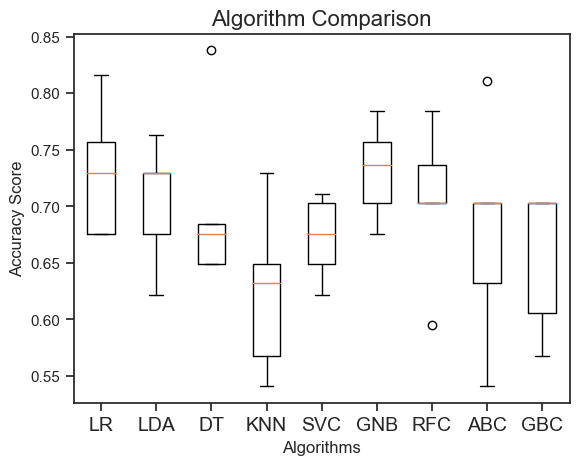

In [183]:
evaluate_algorithms(x_under, y_under)

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b> The max accuracy that we got is 73.12% which is given by Gaussian Naive Bayes algorithm also provided the lowest standard deviation. The score is below than we anticipated. One reason could be that the number of samples might not be enough for the algorithms to let them make enough generilization. Let's increase the number of samples by using <code>SMOTE</code> method.
</div>

### Oversampling using SMOTE

0    215
1    215
dtype: int64


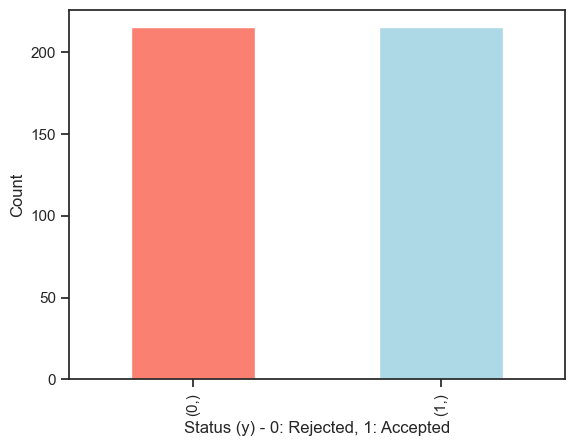

In [188]:
oversampler = SMOTE(random_state=101)
x_over, y_over = oversampler.fit_resample(x_train, y_train)

# Create a dataframe to plot the number of samples for each label
df_y_over = pd.DataFrame(y_over)
print(df_y_over.value_counts())

df_y_over.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.xlabel('Status (y) - 0: Rejected, 1: Accepted')
plt.ylabel('Count')
plt.show()

Now we have 430 samples. Let's check if it will increase the accuracy score.

LR - Mean ACC: 74.88% STD: 0.06
LDA - Mean ACC: 74.65% STD: 0.06
DT - Mean ACC: 79.53% STD: 0.04
KNN - Mean ACC: 72.79% STD: 0.04
SVC - Mean ACC: 72.79% STD: 0.06
GNB - Mean ACC: 75.35% STD: 0.05
RFC - Mean ACC: 83.49% STD: 0.04
ABC - Mean ACC: 79.07% STD: 0.03
GBC - Mean ACC: 83.26% STD: 0.04


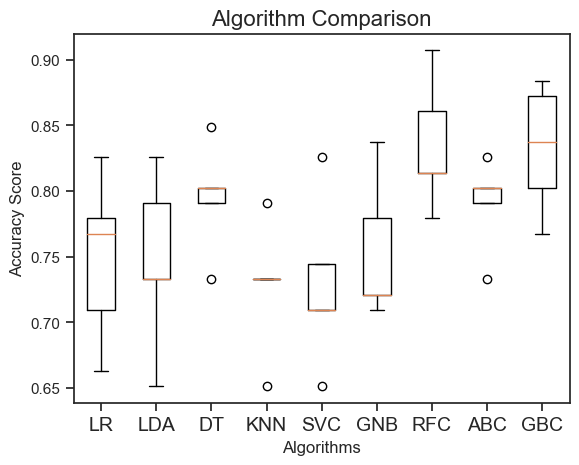

In [189]:
evaluate_algorithms(x_over, y_over)

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
    ✍🏼 <b>Observations:</b> Now we've achieved more than 80% accuracy. The results of Random Forest (RFC) and Gradient Boosting (GBC) are very close to each other. If you check the comparison plot you may see that the whiskers of RFC spreaded out from the interquartile range and the mean value is very close to the lower quartile (Q1). On the other hand GBC provides more stable results. In anycase, I'd prefer to train and test both then use the one that provides the best test result. 
<br /><br />
But before moving with training, I'd like to perform feature selection on categorical values using Chi-Square.
</div>

### Chi-Square

In [193]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Applicant_Income        386 non-null    int64  
 1   Coapplicant_Income      386 non-null    float64
 2   Loan_Amount             386 non-null    int64  
 3   Status                  386 non-null    object 
 4   Dependents_Enc          386 non-null    float64
 5   Tem_Enc                 386 non-null    float64
 6   Gender_Male             386 non-null    uint8  
 7   Married_Yes             386 non-null    uint8  
 8   Education_Not Graduate  386 non-null    uint8  
 9   Self_Employed_Yes       386 non-null    uint8  
 10  Credit_History_1.0      386 non-null    uint8  
 11  Area_Semiurban          386 non-null    uint8  
 12  Area_Urban              386 non-null    uint8  
dtypes: float64(3), int64(2), object(1), uint8(7)
memory usage: 20.9+ KB


In [194]:
from sklearn.feature_selection import chi2

In [195]:
x_chi = df_enc.drop(['Status', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount'], axis=1)
y_chi = df_enc['Status']

chi_score = chi2(x_chi, y_chi)

In [207]:
np.set_printoptions(suppress = True)
chi_score

(array([ 0.37816785,  0.04075077,  0.84986663,  1.10841244,  2.43622167,
         0.01009192, 17.53655776,  5.88425131,  2.06865437]),
 array([0.53858541, 0.84001976, 0.35659007, 0.29242731, 0.11856149,
        0.91998029, 0.00002818, 0.01527689, 0.15035413]))

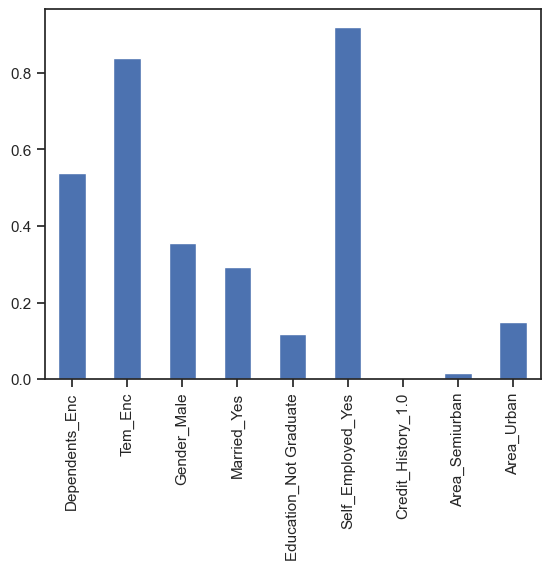

In [201]:
p_values = pd.Series(chi_score[1], index=x_chi.columns)
p_values.plot(kind='bar')
plt.show()

## Evaluating the Model

We'll evaluate the model using below metrics in addition to the accuracy score:

- ROC curve and AUC score
- Confusion matrix
- Classification report

As mentioned in the above section, we'll do it for both RFC and GBC.

In [ ]:
# Scale the numeric features of test set by using the previously fitted scaler
x_test_scaled = scaler.transform(x_test[:, :3])
# Replace the scaled columns in the copied array
x_test[:, :3] = x_test_scaled

In [231]:
# Fit the model using over-sampled training data
model_rfc = RandomForestClassifier()
model_rfc.fit(x_over, y_over)

# Evaluate the model
y_hat_rfc = model_rfc.predict(x_test)

In [232]:
acc_rfc = accuracy_score(y_test, y_hat_rfc) * 100
print('Accuracy score of RandomForestClassifier: %.5f%%' % acc_rfc)

Accuracy score of RandomForestClassifier: 67.94872%


In [233]:
model_gbc = GradientBoostingClassifier()
model_gbc.fit(x_over, y_over)

y_hat_gbc = model_gbc.predict(x_test)

In [230]:
acc = accuracy_score(y_test, y_hat_gbc) * 100
print('Accuracy score of GradientBoostingClassifier: %.5f%%' % acc)

Accuracy score of GradientBoostingClassifier: 52.56410%
